In [1]:
# load packages
library(purrr)        
library(Rgraphviz)    
library(bnlearn)      
library(bnstruct)  
source('K2methods.r') 

Warning message:
"package 'purrr' was built under R version 3.6.3"Loading required package: graph
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: 'BiocGenerics'

The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs

The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min

Loading required

In [2]:
data = child()
data = impute(data)
data = imputed.data(data)

bnstruct :: performing imputation ...
bnstruct :: imputation finished.


In [3]:
mode(data) = 'character'
DF = data.frame(data, stringsAsFactors = TRUE)
cat('The dataset dimensions are:', dim(DF))

colnames(DF) <- child()@variables
head(DF)

The dataset dimensions are: 5000 20

BirthAsphyxia,Disease,Age,LVH,DuctFlow,CardiacMixing,LungParench,LungFlow,Sick,HypDistrib,HypoxiaInO2,CO2,ChestXray,Grunting,LVHReport,LowerBodyO2,RUQO2,CO2Report,XrayReport,GruntingReport
2,3,3,2,1,3,1,1,2,1,1,1,1,2,2,2,3,2,1,2
2,4,2,1,1,2,1,2,2,1,2,1,2,2,1,2,2,1,2,2
2,3,1,2,1,3,1,2,2,1,2,2,2,2,2,1,2,1,2,2
2,4,1,1,1,3,1,1,2,1,3,1,1,2,1,3,1,1,1,2
2,2,1,2,2,4,1,1,1,1,3,1,1,2,2,1,1,1,2,2
2,2,1,2,1,4,1,3,2,1,3,1,3,2,2,2,1,1,3,2


In [4]:
today = 01072023 # default seed = 12345

In [5]:
struct = K2(n = ncol(DF), u = 5, D = DF, seed = today, num.iterations = 5)

order = BirthAsphyxia Disease Age LVH DuctFlow CardiacMixing LungParench LungFlow Sick HypDistrib HypoxiaInO2 CO2 ChestXray Grunting LVHReport LowerBodyO2 RUQO2 CO2Report XrayReport GruntingReport 
Running iteration # 1 u = 1 
The Network score is -61659.46 
  Running iteration # 1 u = 2 
The Network score is -59945.13 
  Running iteration # 1 u = 3 
The Network score is -59945.13 
  Running iteration # 1 u = 4 
The Network score is -59945.13 
  Running iteration # 1 u = 5 
The Network score is -59945.13 
  order = Age DuctFlow Sick XrayReport LVH HypoxiaInO2 ChestXray BirthAsphyxia RUQO2 LVHReport LungFlow CardiacMixing Grunting HypDistrib Disease LungParench CO2 CO2Report LowerBodyO2 GruntingReport 
Running iteration # 2 u = 1 
The Network score is -66168.8 
  Running iteration # 2 u = 2 
The Network score is -63484.91 
  Running iteration # 2 u = 3 
The Network score is -62743.65 
  Running iteration # 2 u = 4 
The Network score is -63198.57 
  Running iteration # 2 u = 5 
The Netwo

In [6]:
# struct = list(NA, 1, c(2, 1), c(3,2), c(3,2), c(3,5,1), 3, c(3,2), c(3,6), c(3,5), 
#     c(3,2), c(8,5), c(3,5), c(3,2), c(3,14), c(3,15), c(14,12,15), c(3,2), c(3,5), c(14,8))
struct

$dag
$dag[[1]]
[1] NA

$dag[[2]]
[1] 1

$dag[[3]]
[1] 2

$dag[[4]]
[1] 2

$dag[[5]]
[1] 2

$dag[[6]]
[1] 2

$dag[[7]]
[1] 2

$dag[[8]]
[1] 2

$dag[[9]]
[1] 2 3

$dag[[10]]
[1] 5 6

$dag[[11]]
[1] 6 7

$dag[[12]]
[1] 7

$dag[[13]]
[1] 8 7

$dag[[14]]
[1] 7 9

$dag[[15]]
[1] 4 2

$dag[[16]]
[1] 11 10

$dag[[17]]
[1] 11

$dag[[18]]
[1] 12

$dag[[19]]
[1] 13

$dag[[20]]
[1] 14


$score
[1] -59945.13

$order
 [1] "BirthAsphyxia"  "Disease"        "Age"            "LVH"           
 [5] "DuctFlow"       "CardiacMixing"  "LungParench"    "LungFlow"      
 [9] "Sick"           "HypDistrib"     "HypoxiaInO2"    "CO2"           
[13] "ChestXray"      "Grunting"       "LVHReport"      "LowerBodyO2"   
[17] "RUQO2"          "CO2Report"      "XrayReport"     "GruntingReport"

$u
[1] 2

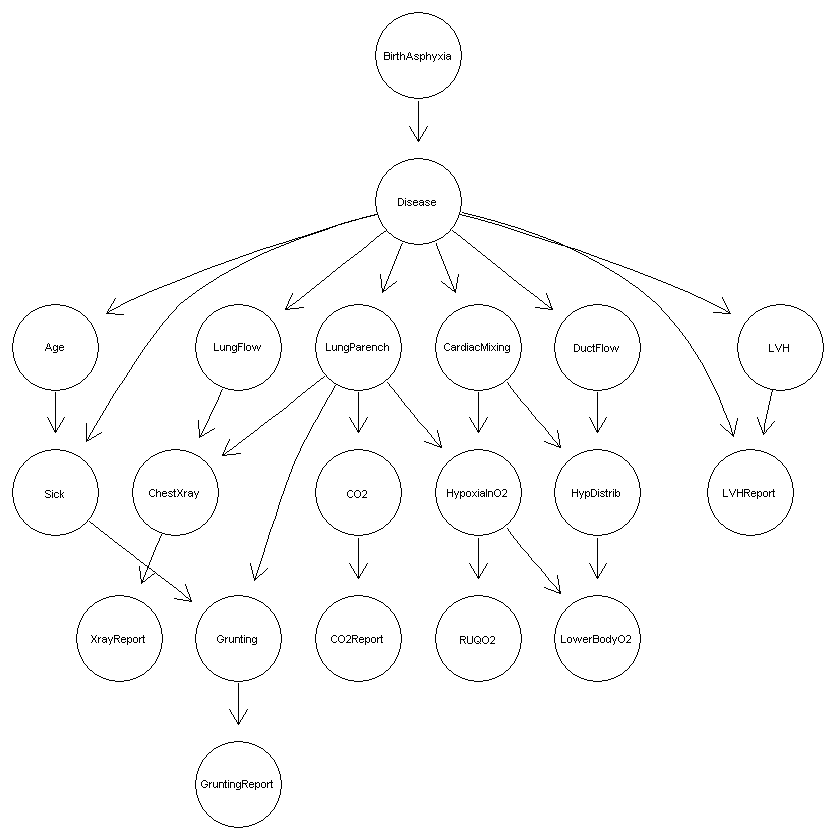

In [7]:
dag = get_dag(names(DF), struct$dag)
graphviz.plot(dag)

In [8]:
arc.strength(dag, data=DF, criterion="x2")

from,to,strength
BirthAsphyxia,Disease,1.129277e-77
Disease,Age,5.432823e-257
Disease,LVH,0.000000e+00
Disease,DuctFlow,0.000000e+00
Disease,CardiacMixing,0.000000e+00
Disease,LungParench,0.000000e+00
Disease,LungFlow,0.000000e+00
Disease,Sick,2.886963e-92
Age,Sick,1.079105e-47
DuctFlow,HypDistrib,9.007386e-133


## `bnlearn` comparison

In [9]:
bn_bayes = bn.fit(dag, data = DF, method = 'bayes', iss = 10)
bn_bayes


  Bayesian network parameters

  Parameters of node Age (multinomial distribution)

Conditional probability table:
 
   Disease
Age          1          2          3          4          5          6
  1 0.90256410 0.75529286 0.35092673 0.80362145 0.83265491 0.87802607
  2 0.07641026 0.16142390 0.20561830 0.13915566 0.11216644 0.09450652
  3 0.02102564 0.08328324 0.44345497 0.05722289 0.05517865 0.02746741

  Parameters of node BirthAsphyxia (multinomial distribution)

Conditional probability table:
          1          2 
0.08622754 0.91377246 

  Parameters of node CardiacMixing (multinomial distribution)

Conditional probability table:
 
             Disease
CardiacMixing           1           2           3           4           5
            1 0.394230769 0.023091565 0.013955256 0.007578031 0.013907734
            2 0.408076923 0.074183530 0.132547785 0.017481993 0.026119403
            3 0.172692308 0.092215989 0.825857950 0.953856543 0.941994573
            4 0.025000000 0.8105089

In [10]:
dataset <- child()
net <- BN(dataset)

In [11]:
net


Bayesian Network: BNDataset

num.nodes 20

variables
BirthAsphyxia Disease Age LVH DuctFlow CardiacMixing LungParench LungFlow Sick HypDistrib HypoxiaInO2 CO2 ChestXray Grunting LVHReport LowerBodyO2 RUQO2 CO2Report XrayReport GruntingReport
discreteness
TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
node.sizes
2 6 3 2 3 4 3 3 2 2 3 3 5 2 2 3 3 2 5 2

In [12]:
net <- learn.network(dataset)

bnstruct :: learning the structure using MMHC ...
bnstruct :: learning using MMHC completed.
bnstruct :: learning network parameters ... 
bnstruct :: parameter learning done.


In [13]:
net


Bayesian Network: BNDataset

num.nodes 20

variables
BirthAsphyxia Disease Age LVH DuctFlow CardiacMixing LungParench LungFlow Sick HypDistrib HypoxiaInO2 CO2 ChestXray Grunting LVHReport LowerBodyO2 RUQO2 CO2Report XrayReport GruntingReport
discreteness
TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
node.sizes
2 6 3 2 3 4 3 3 2 2 3 3 5 2 2 3 3 2 5 2
Adjacency matrix:
               BirthAsphyxia Disease Age LVH DuctFlow CardiacMixing LungParench
BirthAsphyxia              0       1   0   0        0             0           0
Disease                    0       0   1   0        1             1           1
Age                        0       0   0   0        0             0           0
LVH                        0       1   0   0        0             0           0
DuctFlow                   0       0   0   0        0             0           0
CardiacMixing              0       0   0   0        0             0           1
LungParench    

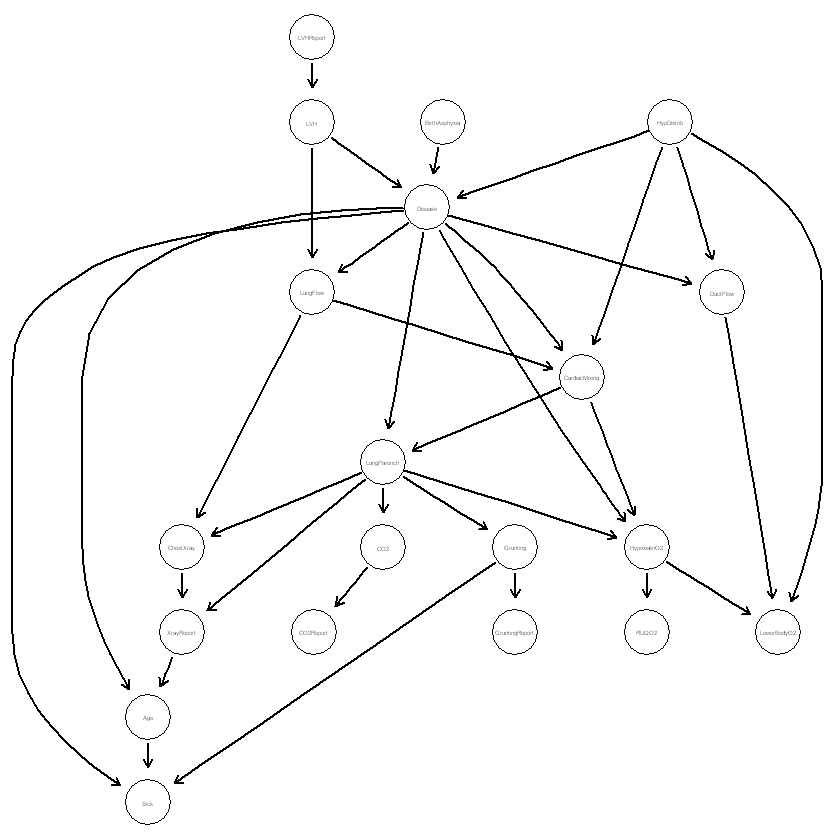

In [14]:
plot(net)

In [15]:
learned <- hc(DF)
modelstring(learned)

[1] "[BirthAsphyxia][Disease|BirthAsphyxia][Age|Disease][LVH|Disease][DuctFlow|Disease][CardiacMixing|Disease][LungParench|Disease][LungFlow|Disease][Sick|Disease:Age][HypDistrib|DuctFlow:CardiacMixing][HypoxiaInO2|CardiacMixing:LungParench][CO2|LungParench][ChestXray|LungParench:LungFlow][LVHReport|LVH][Grunting|LungParench:Sick][LowerBodyO2|HypDistrib:HypoxiaInO2][RUQO2|HypoxiaInO2][CO2Report|CO2][XrayReport|ChestXray][GruntingReport|Grunting]"

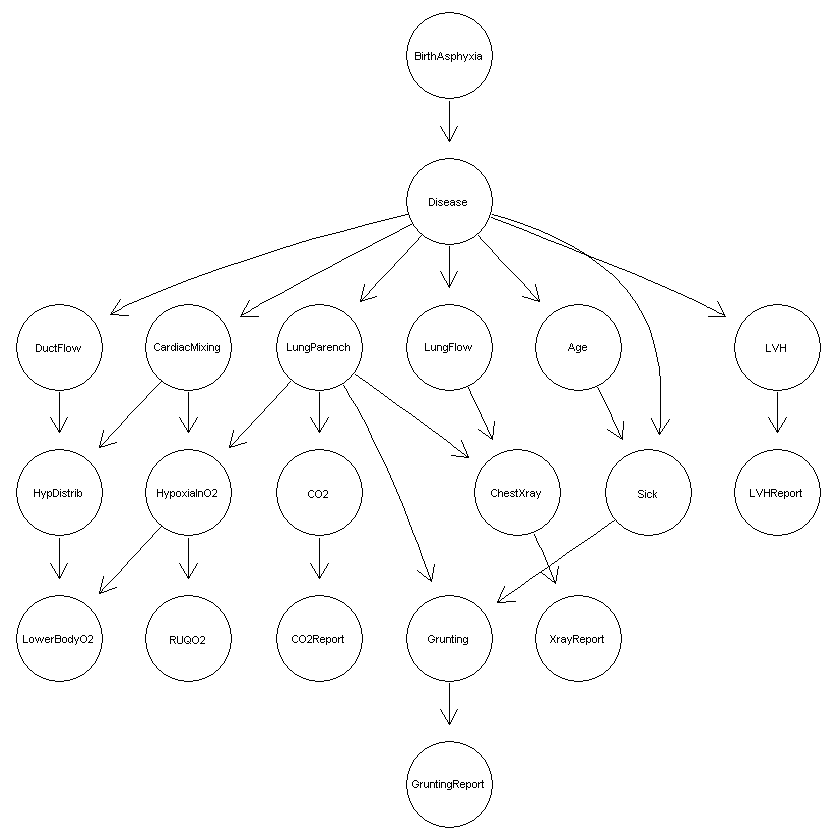

In [16]:
graphviz.plot(learned)

In [17]:
score(learned, data = DF, type = "bic")

[1] -59936.5